In [1]:
from ce3_compare import set_name, compare, write_submission_txt, grade, set_idm
from feature_model import FeatureModel
import numpy as np

In [2]:
set_name("changhun", "Kim")
set_idm("no12neni")

# Computer exercise 3 (Global post-hoc methods)

- Partial dependence plots (PDP)
- Individual conditional expectation (ICE) <- *local*
- M-Plot
- Accumulated local effects (ALE)
- Permutation feature importance

<img src="pdp_ice_mplot_ale.png" width="1200"/>

## Partial dependence plots (PDP)

In [3]:
bike_path = "datasets/bike/rented_bikes_day_pre.csv"
bike_data = FeatureModel(bike_path)
bike_data.df = bike_data.df.drop(labels=["casual", "registered"], axis=1)
bike_data.add_target("cnt")
bike_data.add_all_features_but_target()

FeatureModel(->Not fully specified yet!)
FeatureModel(cnt ~ -1 + season + yr + mnth + holiday + weekday + workingday + weathersit + temp + hum + windspeed + days_since_01_01_2011 )


In [4]:
X,y = bike_data.return_Xy(train_test_split=False)

In [14]:
from sklearn.inspection import PartialDependenceDisplay

def pdp_plot(M, X_train, y_train, X_val=None, kind="average", features=["temp","hum","windspeed"]):
    if X_val is None:
        X_val = X_train

    try:
        m = M()
    except:
        m = M

    m.fit(X_train, y_train)
    print("R2-score: ", m.score(X_train, y_train))

    pdp = PartialDependenceDisplay.from_estimator(
        m,
        X_val,
        features,
        kind=kind, grid_resolution=100, percentiles=(0.,1),
    )

    for ax in pdp.axes_[0,:]:
        ax.grid(True)
        ax.set_ylim(0,6000)


### PDP for Linear Regression

R2-score:  0.8003086666446174


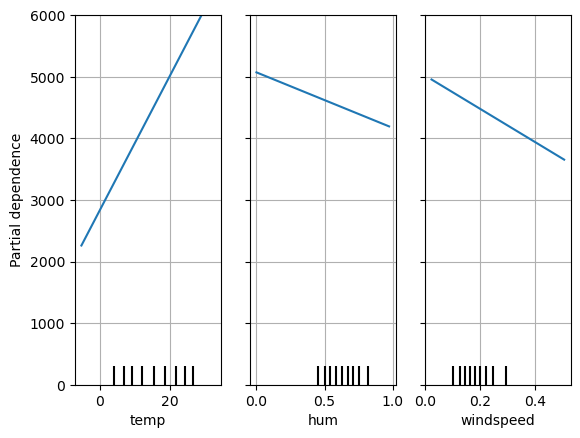

In [6]:
from sklearn.linear_model import LinearRegression

pdp_plot(LinearRegression, X, y)

R2-score:  0.8003086666446174


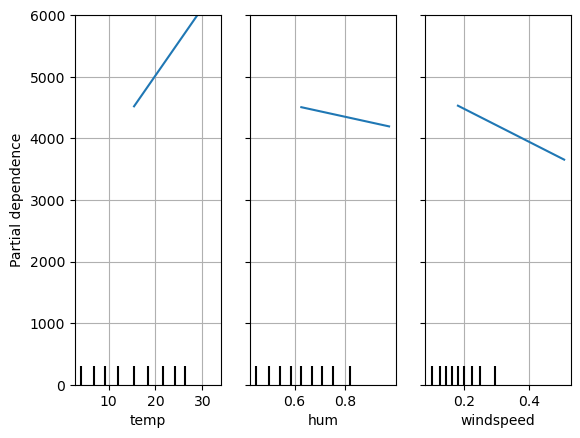

In [15]:
from sklearn.linear_model import LinearRegression

pdp_plot(LinearRegression, X, y)

Q: What is the meaning of the y-axis in the PDP plot?

Q: What is the meaning of the y-axis for classification?

Q: Does it make sense to create a PDP plot for a LinearRegression?

Q: Does it make sense to create a PDP plot for any inherently explainable model?

### PDP for RandomForestRegressor

/var/folders/34/q4vcf0710b9cm75lplc7sx2w0000gn/T/ipykernel_3961/4225387696.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(X_train, y_train)


R2-score:  0.9840141271287302


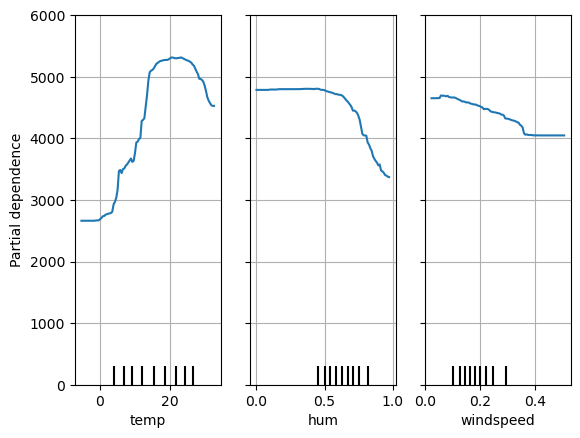

In [7]:
from sklearn.ensemble import RandomForestRegressor

pdp_plot(RandomForestRegressor, X, y)

/var/folders/34/q4vcf0710b9cm75lplc7sx2w0000gn/T/ipykernel_3961/2064486524.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(X_train, y_train)


R2-score:  0.9840637280959943


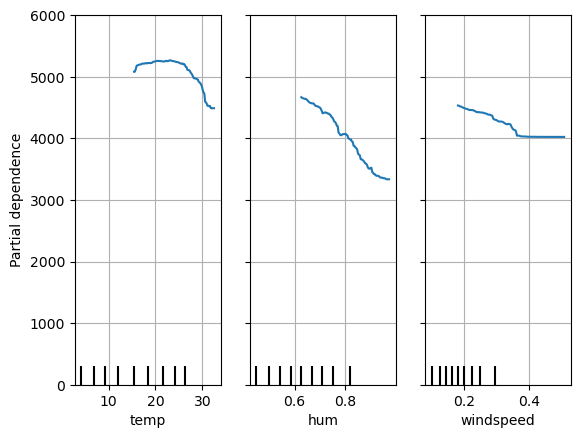

In [16]:
from sklearn.ensemble import RandomForestRegressor

pdp_plot(RandomForestRegressor, X, y)

### PDP for AdaBoost

/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2-score:  0.8610008616578849


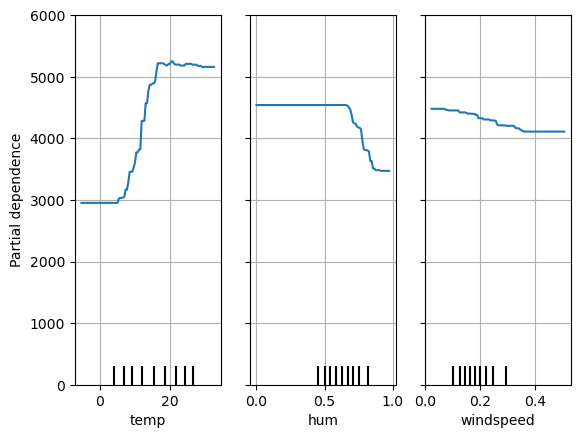

In [8]:
from sklearn.ensemble import AdaBoostRegressor

pdp_plot(AdaBoostRegressor, X, y)

Q: Does it make sense to use validation data for the averaging?

Q: If you want to explain your model's behaviour, would you use all data / only training data / only validation data?

In [9]:
X_train, y_train, X_val, y_val = bike_data.return_Xy(train_test_split=True)

/var/folders/34/q4vcf0710b9cm75lplc7sx2w0000gn/T/ipykernel_3961/4225387696.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(X_train, y_train)


R2-score:  0.982555164666877


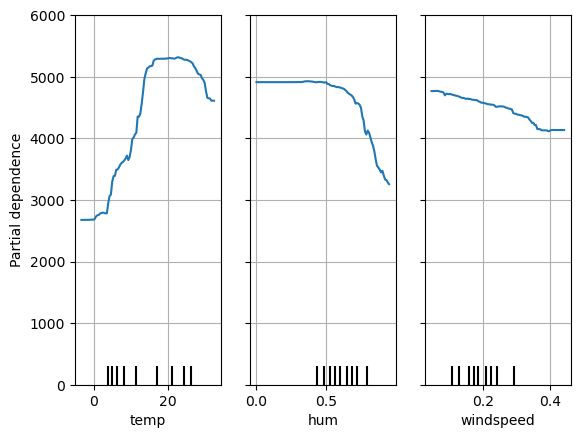

In [10]:
pdp_plot(RandomForestRegressor, X_train, y_train, X_val)

### Exercise 3.1

Use a `RandomForestRegressor` with `random_state`=1 to predict the number of rented bikes. What is the $\Delta y$ in the last/directly above PDP-plot for the `temp` feature between $20^\circ$ and $0^\circ$? Write a function that returns that exact value.

In [12]:
from sklearn.inspection import partial_dependence
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pdp, axes = partial_dependence(model, X, features=["windspeed"],  grid_resolution=100)


/var/folders/34/q4vcf0710b9cm75lplc7sx2w0000gn/T/ipykernel_3961/3414250509.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/inspection/_partial_dependence.py:508: FutureWarning: A Bunch will be returned in place of 'predictions' from version 1.1 (renaming of 0.26) with partial dependence results accessible via the 'average' key. In the meantime, pass kind='average' to get the future behaviour.
  warnings.warn(


In [13]:
axes[0]

array([0.07838264, 0.0810587 , 0.08373477, 0.08641084, 0.0890869 ,
       0.09176297, 0.09443904, 0.0971151 , 0.09979117, 0.10246724,
       0.1051433 , 0.10781937, 0.11049544, 0.1131715 , 0.11584757,
       0.11852364, 0.1211997 , 0.12387577, 0.12655184, 0.1292279 ,
       0.13190397, 0.13458004, 0.1372561 , 0.13993217, 0.14260824,
       0.1452843 , 0.14796037, 0.15063644, 0.1533125 , 0.15598857,
       0.15866464, 0.1613407 , 0.16401677, 0.16669284, 0.1693689 ,
       0.17204497, 0.17472104, 0.1773971 , 0.18007317, 0.18274924,
       0.1854253 , 0.18810137, 0.19077744, 0.1934535 , 0.19612957,
       0.19880564, 0.2014817 , 0.20415777, 0.20683384, 0.2095099 ,
       0.21218597, 0.21486204, 0.2175381 , 0.22021417, 0.22289024,
       0.2255663 , 0.22824237, 0.23091844, 0.23359451, 0.23627057,
       0.23894664, 0.24162271, 0.24429877, 0.24697484, 0.24965091,
       0.25232697, 0.25500304, 0.25767911, 0.26035517, 0.26303124,
       0.26570731, 0.26838337, 0.27105944, 0.27373551, 0.27641

In [22]:
from sklearn.inspection import partial_dependence
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pdp, axes = partial_dependence(model, X, features=["temp"],  grid_resolution=100)


/var/folders/34/q4vcf0710b9cm75lplc7sx2w0000gn/T/ipykernel_24012/1429917811.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/inspection/_partial_dependence.py:508: FutureWarning: A Bunch will be returned in place of 'predictions' from version 1.1 (renaming of 0.26) with partial dependence results accessible via the 'average' key. In the meantime, pass kind='average' to get the future behaviour.
  warnings.warn(


In [23]:
axes[0]

array([ 1.91821072,  2.18320268,  2.44819465,  2.71318661,  2.97817857,
        3.24317053,  3.5081625 ,  3.77315446,  4.03814642,  4.30313839,
        4.56813035,  4.83312231,  5.09811427,  5.36310624,  5.6280982 ,
        5.89309016,  6.15808213,  6.42307409,  6.68806605,  6.95305801,
        7.21804998,  7.48304194,  7.7480339 ,  8.01302587,  8.27801783,
        8.54300979,  8.80800175,  9.07299372,  9.33798568,  9.60297764,
        9.8679696 , 10.13296157, 10.39795353, 10.66294549, 10.92793746,
       11.19292942, 11.45792138, 11.72291334, 11.98790531, 12.25289727,
       12.51788923, 12.7828812 , 13.04787316, 13.31286512, 13.57785708,
       13.84284905, 14.10784101, 14.37283297, 14.63782494, 14.9028169 ,
       15.16780886, 15.43280082, 15.69779279, 15.96278475, 16.22777671,
       16.49276868, 16.75776064, 17.0227526 , 17.28774456, 17.55273653,
       17.81772849, 18.08272045, 18.34771242, 18.61270438, 18.87769634,
       19.1426883 , 19.40768027, 19.67267223, 19.93766419, 20.20

In [24]:
pdp[0]

array([2823.62712702, 2825.21253016, 2842.85562687, 2837.86227883,
       2836.61306546, 2837.43820856, 2837.78664207, 2841.7846663 ,
       3068.17724712, 3118.05584175, 3139.80851235, 3273.26348138,
       3401.40420213, 3408.10911356, 3410.26942232, 3506.71943815,
       3460.84902934, 3484.99582345, 3509.21326075, 3511.43923931,
       3612.43056112, 3616.30157202, 3633.64531694, 3636.5146068 ,
       3658.84885927, 3676.34132749, 3700.95564359, 3707.58440183,
       3646.88262485, 3661.23849583, 3737.99124128, 3848.91141802,
       3936.57253831, 3934.27717307, 4032.12230224, 4035.47508369,
       4030.08554624, 4256.80480565, 4307.5494506 , 4310.56810695,
       4348.70301518, 4505.51599931, 4620.19265649, 4776.01359341,
       4904.76357923, 4969.86256076, 5062.85417882, 5111.8322477 ,
       5133.75376183, 5138.95096236, 5158.66719337, 5165.61254195,
       5168.96123565, 5239.55649893, 5252.6660851 , 5269.56452338,
       5277.63640176, 5290.6988093 , 5295.18372418, 5291.87437

In [90]:
    value1 = 20
    value2 = 0
    pdp, axes = partial_dependence(model, X, features=["temp"], kind = "average",  grid_resolution=100)
    
    y_at_value1 = np.interp(value1, axes[0], pdp[0])
    y_at_value2 = np.interp(value2, axes[0], pdp[0])
    
    delta_y = y_at_value1 - y_at_value2

ValueError: object of too small depth for desired array

In [85]:
from sklearn.inspection import partial_dependence

def calculate_delta_y(model, X, feature, value1, value2):
    pdp, axes = partial_dependence(model, X, features=[feature], kind = "average",  grid_resolution=100)
    
    y_at_value1 = np.interp(value1, axes[0], pdp[0])
    y_at_value2 = np.interp(value2, axes[0], pdp[0])
    
    delta_y = y_at_value1 - y_at_value2
    return delta_y


In [68]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

/var/folders/34/q4vcf0710b9cm75lplc7sx2w0000gn/T/ipykernel_2910/4020707445.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(random_state=1)

In [70]:
X_val_temp_20 = X_val.copy()

In [71]:
X_val_temp_0 = X_val.copy()

In [72]:
X_val_temp_20['temp'] = 20
X_val_temp_0['temp'] = 0

In [80]:
np.average(model.predict(X_val_temp_20)) - np.average(model.predict(X_val_temp_0))

2354.0546938775506

In [11]:
def ex_3_1() -> float:
    model = RandomForestRegressor(random_state=1)
    model.fit(X_train, y_train)
    X_val_temp_20 = X_val.copy()
    X_val_temp_0 = X_val.copy()
    X_val_temp_20['temp'] = 20
    X_val_temp_0['temp'] = 0
    return np.average(model.predict(X_val_temp_20)) - np.average(model.predict(X_val_temp_0))

compare("ex_3_1", ex_3_1)


Great work!


/var/folders/34/q4vcf0710b9cm75lplc7sx2w0000gn/T/ipykernel_23848/242787983.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [86]:
def ex_3_1() -> float:
    model = RandomForestRegressor(random_state=1)
    model.fit(X_train, y_train)
    return calculate_delta_y(model, X_val, 'temp', 20, 0)

compare("ex_3_1", ex_3_1)


/var/folders/34/q4vcf0710b9cm75lplc7sx2w0000gn/T/ipykernel_2910/961742501.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


The provided function `<function ex_3_1 at 0x13cc14310>` does either not take the required inputs OR does not produce the right outputs OR your environment does not have all files/packages in order..


### Exercise 3.2

In the last/directly above PDP-plot for the `windspeed` feature on the x-axis, on which windspeed value is exactly the 5th vertical line? Write a function that returns that exact value.

In [12]:
def line_value(i, min_wind, max_wind, n):
    return min_wind + (i - 1) * (max_wind - min_wind) / (n - 1)


In [89]:
def ex_3_2() -> float:
    return 0.19 # rough estimate


In [90]:
ex_3_2()

0.19

In [91]:
compare("ex_3_2", ex_3_2)

Your function does interface but there is some mistake here in your function(/logic) .. 


### PDP for classification

In [14]:
cancer_path = "datasets/cervical_cancer/risk_factors_cervical_cancer_pre.csv"
cancer_data = FeatureModel(cancer_path)
cancer_data.add_target("Biopsy")
cancer_data.add_all_features_but_target()
X_train, y_train, X_val, y_val = cancer_data.return_Xy(train_test_split=True)

FeatureModel(->Not fully specified yet!)
FeatureModel(Biopsy ~ -1 + Age + Number_of_sexual_partners + First_sexual_intercourse + Num_of_pregnancies + Smokes + Smokes__years + Hormonal_Contraceptives + Hormonal_Contraceptives__years + IUD + IUD__years + STDs + STDs__Number_of_diagnosis + STDs__Time_since_first_diagnosis + STDs__Time_since_last_diagnosis )


In [15]:
from sklearn.inspection import PartialDependenceDisplay

def pdp_plot(M, X_train, y_train, features, X_val=None):
    if X_val is None:
        X_val = X_train

    m = M
    m.fit(X_train, y_train)
    print("R2-score: ", m.score(X_train, y_train))

    pdp = PartialDependenceDisplay.from_estimator(
        m,
        X_val,
        features,
        kind="average", grid_resolution=100, percentiles=(0,1),
    )

    for ax in pdp.axes_[0,:]:
        ax.grid(True)


/Users/gimchangheon/opt/anaconda3/envs/xML/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2-score:  0.9373177842565598


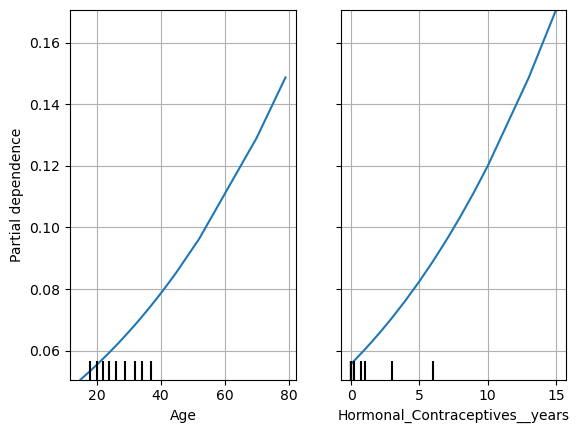

In [16]:
from sklearn.linear_model import LogisticRegression

pdp_plot(LogisticRegression(max_iter=1000), X_train, y_train, X_val=X_val, features=["Age", "Hormonal_Contraceptives__years"])

/var/folders/34/q4vcf0710b9cm75lplc7sx2w0000gn/T/ipykernel_2910/973456559.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(X_train, y_train)


R2-score:  0.9970845481049563


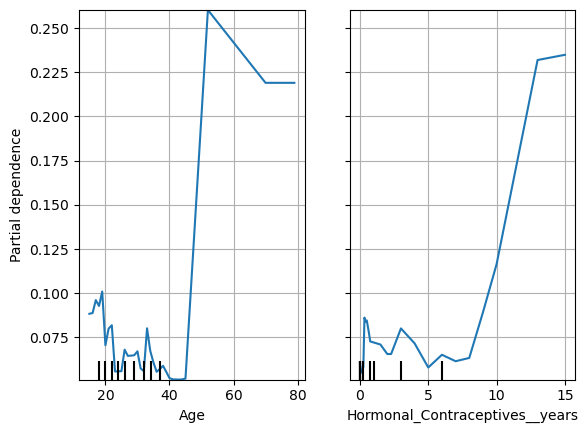

In [17]:
from sklearn.ensemble import RandomForestClassifier
pdp_plot(RandomForestClassifier(), X_train, y_train, X_val=X_val, features=["Age", "Hormonal_Contraceptives__years"])

In [17]:
pdp_plot(RandomForestClassifier(), X_train, y_train, X_val=X_val, features=[["Age", "Hormonal_Contraceptives__years"]])

NameError: name 'RandomForestClassifier' is not defined

Q: Does this plot imply that smoking increases the cancer probability regardless of age? Take a close look at the upper-left corner

## Individual conditional expectation (ICE) <- local

In [97]:
from sklearn.inspection import PartialDependenceDisplay

def ice_plot(M, X_train, y_train, features, X_val=None, kind="individual"):
    if X_val is None:
        X_val = X_train

    m = M
    m.fit(X_train, y_train)
    print("R2-score: ", m.score(X_train, y_train))

    pdp = PartialDependenceDisplay.from_estimator(
        m,
        X_val,
        features,
        kind=kind, grid_resolution=100, percentiles=(0,1),
        pd_line_kw=dict(color="red")
    )

    for ax in pdp.axes_[0,:]:
        ax.grid(True)

/tmp/ipykernel_63855/3820552181.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(X_train, y_train)


R2-score:  0.9970845481049563


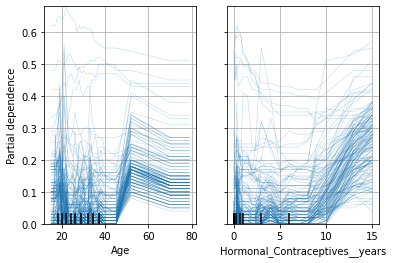

In [98]:
ice_plot(RandomForestClassifier(random_state=1), X_train, y_train, X_val=X_val, features=["Age", "Hormonal_Contraceptives__years"])

/tmp/ipykernel_63855/3820552181.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(X_train, y_train)


R2-score:  0.9970845481049563


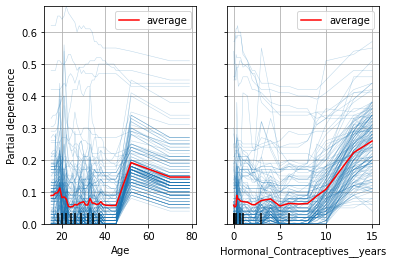

In [99]:
ice_plot(RandomForestClassifier(random_state=1), X_train, y_train, X_val=X_val, features=["Age", "Hormonal_Contraceptives__years"], kind="both")

### Exercise 3.3

Use a `RandomForestClassifier(random_state=1)`.
What is the predicted cancer probability with an Age of sixty years according to the datapoint with the highest predicted cancer probability of the validation dataset?
Write a function that returns that value.

In [100]:
def ex_3_3() -> float:
    return 0.6 # Definitely between 0.5 and 0.7, see plot directly above


In [101]:
ex_3_3()

0.6

In [102]:
compare("ex_3_3", ex_3_3)

Your function does interface but there is some mistake here in your function(/logic) .. 


## Accumulated local effects (ALE)

In [103]:
from PyALE import ale # <- This really is more of an m-plot

In [104]:
X,y = bike_data.return_Xy()
regr = RandomForestRegressor(random_state=1)
regr.fit(X,y)

/tmp/ipykernel_63855/890520154.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X,y)


RandomForestRegressor(random_state=1)

PyALE._ALE_generic:INFO: Continuous feature detected.


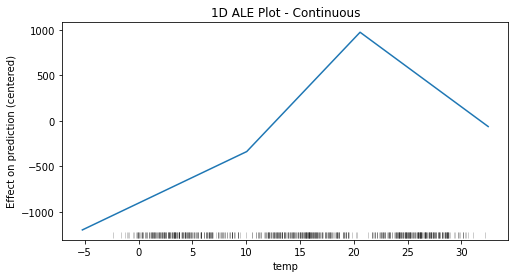

In [105]:
ale_eff = ale(X, regr, ["temp"], grid_size=3, include_CI=False,)

In [106]:
ale_eff

,eff,size
temp,,
-5.220871,-1200.381206,0.0
10.055849,-338.901575,244.0
20.591651,972.902278,244.0
32.498349,-63.894759,243.0


PyALE._ALE_generic:INFO: Continuous feature detected.


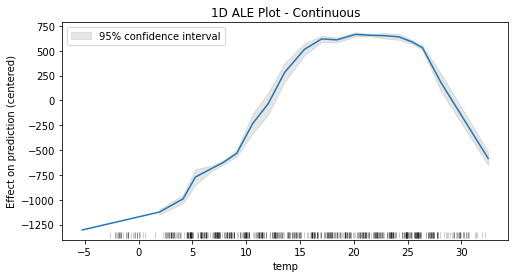

In [107]:
ale_eff = ale(X, regr, ["temp"], grid_size=20, include_CI=True, C=0.95)

In [108]:
ale_eff.reset_index()

,temp,eff,size,lowerCI_95%,upperCI_95%
0,-5.220871,-1304.437601,0.0,NaN,NaN
1,1.931288,-1124.719223,37.0,-1151.469293,-1097.969152
2,4.141651,-991.390612,36.0,-1035.050161,-947.731062
3,5.282623,-771.891422,37.0,-851.772184,-692.010661
4,6.805000,-684.808922,36.0,-712.302558,-657.315286
5,7.823349,-628.386760,37.0,-649.767757,-607.005763
6,9.124356,-533.140371,36.0,-563.883810,-502.396933
7,10.604151,-233.696858,37.0,-332.230836,-135.162880
8,12.053349,-32.454636,36.0,-143.061396,78.152125
9,13.580849,282.745635,37.0,187.392936,378.098333


### Exercise 3.4

For what *lower* temperature is the expectation of the centered effect on the predicted number of rented bikes exactly zero?
(You may use the table directly above)

In [109]:
def ex_3_4() -> float:
    return 12.5


In [110]:
ex_3_4()

12.5

In [111]:
compare("ex_3_4", ex_3_4)

Your function does interface but there is some mistake here in your function(/logic) .. 


### Exercise 3.5 (harder)

Using the above table, what is the 95%-confidence interval of the effect delta when going from `temp=1.931288` to `temp=4.141651`?

*Hint 1*: The 95%-confidence intervall for a normal distribution is at $1.96$ standard deviations

*Hint 2*: https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables

In [112]:
def ex_3_5() -> (float, float):
    return 0, 200.0


In [113]:
ex_3_5()

(0, 200.0)

In [114]:
compare("ex_3_5", ex_3_5)

There must be at least one second downtime between `compare` calls


## Permutation feature importance

Features that are deemed of low importance for a bad model (low cross-validation score) could be very important for a good model. Therefore it is always important to evaluate the predictive power of a model using a held-out set (or better with cross-validation) prior to computing importances. Permutation importance does not reflect to the intrinsic predictive value of a feature by itself but *how important this feature is for a particular model*.


In [115]:
from sklearn.inspection import permutation_importance

In [116]:
X_train, y_train, X_val, y_val = bike_data.return_Xy(train_test_split=True)

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
regr = GradientBoostingRegressor(random_state=1)
regr.fit(X_train, y_train)
regr.score(X_val, y_val)

/home/simon/miniforge3/envs/new_xML/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9021025738192169

In [118]:
r = permutation_importance(regr, X_val, y_val, n_repeats=20, random_state=1)

In [119]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_val.columns[i]:<22} | "
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

days_since_01_01_2011  | 0.711 +/- 0.047
temp                   | 0.459 +/- 0.034
hum                    | 0.050 +/- 0.010
windspeed              | 0.030 +/- 0.009
weathersit             | 0.016 +/- 0.007
season                 | 0.011 +/- 0.004
mnth                   | 0.008 +/- 0.003
workingday             | 0.007 +/- 0.002


### Exercise 3.6

Using a `GradientBoostingClassifier(random_state=1)` and `permutation_importance(..., n_repeats=20, random_state=1)`. What is the most important feature of in the cervical cancer dataset?
Write a function that returns this column name.

In [120]:
def ex_3_6() -> str:
    return "column_name"


In [121]:
ex_3_6()

'column_name'

In [122]:
compare("ex_3_6", ex_3_6)

Your function does interface but there is some mistake here in your function(/logic) .. 


Q: Argue why you might question this result?

Q: Repeat `ex_3_6` with a `RandomForestClassifier` instead. What is now the result?

In [123]:
from ce3_compare import scores

In [124]:
scores

{'ex_3_1': False,
 'ex_3_3': False,
 'ex_3_4': False,
 'ex_3_2': False,
 'ex_3_5': False,
 'ex_3_6': False}

In [125]:
write_submission_txt()

In [126]:
grade("ce3_Simon_Bachhuber.txt")

'0.0% are correct'